## Linear regression with one variable - ext1.m
In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.
The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

In [123]:
def warmUpExercise(*args, **kwargs):
    # warmUpExercise Example function in python
    #   warmUpExercise() is an example function that returns the 5x5 identity matrix
    # ============= YOUR CODE HERE ==============
    # Instructions: Return the 5x5 identity matrix 
    #               In python, we return values by defining which variables
    #               represent the return values (at the top of the file)
    #               and then set them accordingly. 
    return np.identity(5)

In [124]:
## ==================== Part 1: Basic Function ====================
# Complete warmUpExercise.py

print('Running warmUpExercise...')
print('5x5 Identity Matrix: ')

print(warmUpExercise())

Running warmUpExercise...
5x5 Identity Matrix: 
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [125]:
def plotData(x, y):
    #PLOTDATA Plots the data points x and y into a new figure 
    #   PLOTDATA(x,y) plots the data points and gives the figure axes labels of
    #   population and profit.

    # ====================== YOUR CODE HERE ======================
    # Instructions: Plot the training data into a figure using the 
    #               "figure" and "plot" commands. Set the axes labels using
    #               the "xlabel" and "ylabel" commands. Assume the 
    #               population and revenue data have been passed in
    #               as the x and y arguments of this function.
    # fig = plt.figure() # open a new figure window
    
    plt.plot(x,y,'rx', markersize=10, label='Training data')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.show(block=False) # prevents having to close the graph to move forward with ex1.py

Plotting Data...


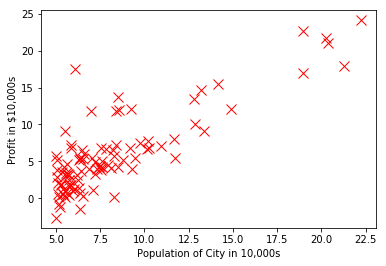

In [129]:
## ======================= Part 2: Plotting =======================
print('Plotting Data...')
data = np.genfromtxt('./data/ex1data1.txt', delimiter=',')
X = data[:,0]
y = data[:,1]
m = len(y) # number of training examples
plotData(X,y)

In [127]:
def computeCost(X, y, theta):
    #COMPUTECOST Compute cost for linear regression
    #   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    #   parameter for linear regression to fit the data points in X and y

    # Initialize some useful values
    m = len(y) # number of training examples

    # You need to return the following variables correctly 
    J = 0

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.

    # note that 
    #theta is an (n+1)-dimensional vector 
    #X is an m x (n+1)-dimensional matrix
    #y is an m-dimensional vector

    s = np.power(( X.dot(theta) - np.transpose([y]) ), 2)
    J = (1.0/(2*m)) * s.sum( axis = 0 )

    return J
def gradientDescent(X, y, theta, alpha, num_iters):

    #GRADIENTDESCENT Performs gradient descent to learn theta
    #   theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
    #   taking num_iters gradient steps with learning rate alpha

    # Initialize some useful values
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))

    for i in range(num_iters):

        # ====================== YOUR CODE HERE ======================
        # Instructions: Perform a single gradient step on the parameter vector
        #               theta. 
        #
        # Hint: While debugging, it can be useful to print out the values
        #       of the cost function (computeCost) and gradient here.
        #
        theta = theta - alpha*(1.0/m) * np.transpose(X).dot(X.dot(theta) - np.transpose([y]))
        # ============================================================
        # Save the cost J in every iteration    
        J_history[i] = computeCost(X, y, theta)
        # print(J_history[i])
    return theta,J_history
def predict(X_new,theta):
    return np.dot(X_new,theta.T)

Running Gradient Descent...
[32.07273388]
Theta found by gradient descent: 
-3.630291, 1.166362


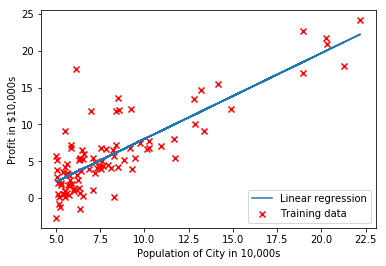

For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


In [135]:
## =================== Part 3: Gradient descent ===================
print('Running Gradient Descent...')

X_padded = np.column_stack((np.ones((m,1)), X)) # Add a column of ones to x
theta = np.zeros((2, 1)) # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

# compute and display initial cost
print(computeCost(X_padded, y, theta))

# run gradient descent
theta,J_history = gradientDescent(X_padded, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent: ')
print("{:f}, {:f}".format(theta[0,0], theta[1,0]))

# # Plot the linear fit
plt.scatter(X,y,c='red',marker='x',label='Training data')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X,X_padded.dot(theta), label='Linear regression')
l=plt.legend(loc='lower right')
l.set_zorder(20)
plt.show()

# # Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]).dot(theta)
print("For population = 35,000, we predict a profit of {:f}".format( float(predict1*10000) ))
predict2 = np.array([1, 7]).dot(theta)
print('For population = 70,000, we predict a profit of {:f}'.format( float(predict2*10000) ))

Visualizing J(theta_0, theta_1)...


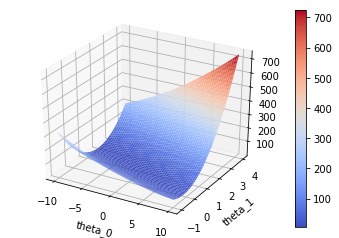

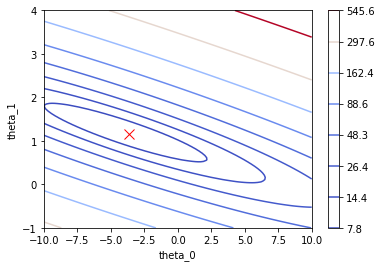

In [136]:
## ============= Part 4: Visualizing J(theta_0, theta_1) =============
print('Visualizing J(theta_0, theta_1)...')

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [[theta0_vals[i]], [theta1_vals[j]]]
        J_vals[i,j] = computeCost(X_padded, y, t)

# Because of the way meshgrids work in the surf command, we need to 
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = np.transpose(J_vals)

# Surface plot

fig = plt.figure()
ax = fig.gca(projection='3d')
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals) # necessary for 3D graph
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=cm.coolwarm, rstride=2, cstride=2)
fig.colorbar(surf)
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.show(block=False)


# # Contour plot
fig = plt.figure()
ax = fig.add_subplot(111)
# # Plot J_vals as 20 contours spaced logarithmically between 0.01 and 100
cset = plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20), cmap=cm.coolwarm)
fig.colorbar(cset)
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta[0,0], theta[1,0], 'rx', markersize=10, linewidth=2)
plt.show(block=False)


## Linear regression with multiple variable -ext1-multi.m
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

In [150]:
## ================ Part 1: Feature Normalization ================

print('Loading data ...\n')

## Load Data
data = np.loadtxt('data/ex1data2.txt', delimiter=",")
X = data[:,:2]
y = data[:,2]
m = len(y) # number of training examples

# Print out some data points
print('First 10 examples from the dataset: \n')
for i in range(10):
    print ("x = [{:.0f} {:.0f}], y = {:.0f}".format(X[i,0], X[i,1], y[i]))


Loading data ...

First 10 examples from the dataset: 

x = [2104 3], y = 399900
x = [1600 3], y = 329900
x = [2400 3], y = 369000
x = [1416 2], y = 232000
x = [3000 4], y = 539900
x = [1985 4], y = 299900
x = [1534 3], y = 314900
x = [1427 3], y = 198999
x = [1380 3], y = 212000
x = [1494 3], y = 242500


In [213]:
def featureNormalize(X):
    #FEATURENORMALIZE Normalizes the features in X 
    #   FEATURENORMALIZE(X) returns a normalized version of X where
    #   the mean value of each feature is 0 and the standard deviation
    #   is 1. This is often a good preprocessing step to do when
    #   working with learning algorithms.


    # You need to set these values correctly
    X_norm = X
    mu    = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))

    # ====================== YOUR CODE HERE ======================
    # Instructions: First, for each feature dimension, compute the mean
    #               of the feature and subtract it from the dataset,
    #               storing the mean value in mu. Next, compute the 
    #               standard deviation of each feature and divide
    #               each feature by it's standard deviation, storing
    #               the standard deviation in sigma. 
    #
    #               Note that X is a matrix where each column is a 
    #               feature and each row is an example. You need 
    #               to perform the normalization separately for 
    #               each feature. 
    #
    # Hint: You might find the 'mean' and 'std' functions useful.
    #       

    for i in range(X.shape[1]):
        mu[:,i] = np.mean(X[:,i])
        sigma[:,i] = np.std(X[:,i])
        X_norm[:,i] = (X[:,i] - float(mu[:,i]))/float(sigma[:,i])
    return X_norm, mu, sigma
def featureNormalizeV2(X):
    X_norm = X
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm=(X-mu)/sigma
    return X_norm,mu.reshape((1,X.shape[1])),sigma.reshape((1,X.shape[1]))
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    return gradientDescent(X, y, theta, alpha, num_iters)

In [152]:
#Plot the convergence graph
def plotConvergenceGraph(J_history):
    print('Convergence of gradient descent with an appropriate learning rate:')
    plt.plot(range(J_history.size), J_history,"-b", linewidth=2)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    plt.show()

In [217]:
# Scale features and set them to zero mean
print('Normalizing Features...')

X_norm, mu, sigma = featureNormalize(X)
#X_norm2, mu2, sigma2 = featureNormalizeV2(X)
print(mu.shape)
print(mu2.shape)
#X_norm1, mu1, sigma1 = featureNormalizeV2(X)

# Add intercept term to X
X_padded = np.column_stack((np.ones((m,1)), X_norm)) # Add a column of ones to x


Normalizing Features...
(1, 2)
(1, 2)


Running gradient descent...
Convergence of gradient descent with an appropriate learning rate:


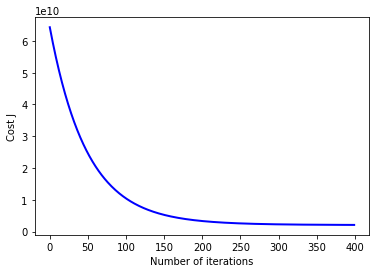

Theta computed from gradient descent: 
334302.063993, 99411.449474, 3267.012854

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $164,372,994.73


In [218]:
## ================ Part 2: Gradient Descent ================

print('Running gradient descent...')

# Choose some alpha value
alpha = 0.01
num_iters = 400

# Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1)) 

theta, J_history = gradientDescentMulti(X_padded, y, theta, alpha, num_iters)

# Plot the convergence graph
plotConvergenceGraph(J_history)

# Display gradient descent's result
print('Theta computed from gradient descent: ')
print("{:f}, {:f}, {:f}".format(theta[0,0], theta[1,0], theta[2,0]))
print("")

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================
# Recall that the first column of X is all-ones. Thus, it does
# not need to be normalized.
area_norm = (1650 - float(mu[:,0])) / float(sigma[:,0])
br_norm = (3 - float(mu[:,1]))/float(sigma[:,1])
house_norm_padded = np.array([1, area_norm, br_norm])

price = np.array(house_norm_padded).dot(theta)

# ============================================================

print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n ${:,.2f}".format(price[0]))

In [146]:
def normalEqn(X,y):
    return np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X)),X.T),y)

In [148]:
## ================ Part 3: Normal Equations ================

print('Solving with normal equations...')

# ====================== YOUR CODE HERE ======================
# Instructions: The following code computes the closed form 
#               solution for linear regression using the normal
#               equations. You should complete the code in 
#               normalEqn.m
#
#               After doing so, you should complete this code 
#               to predict the price of a 1650 sq-ft, 3 br house.
#

## Load Data
#data = np.loadtxt('ex1data2.txt', delimiter=",")
#X = data[:,:2]
#y = data[:,2]
#m = len(y) # number of training examples

# Add intercept term to X
X_padded = np.column_stack((np.ones((m,1)), X))

# Calculate the parameters from the normal equation
theta = normalEqn(X_padded, y)

# Display normal equation's result
print('Theta computed from the normal equations:')
print("{:f}, {:f}, {:f}".format(theta[0], theta[1], theta[2]))
print('')


# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================
house_norm_padded = np.array([1, 1650, 3])
price = np.array(house_norm_padded).dot(theta)

# ============================================================

print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n ${:,.2f}".format(price))

Solving with normal equations...
Theta computed from the normal equations:
340412.659574, 109447.796470, -6578.354854

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $180,909,541.77
